# Binning in Feature Enginneering

Binning is the process of dividing a continuous variable into a set of intervals or bins. For example, suppose you have a column of ages in a dataset. Binning can help you group these ages into categories such as '0-10', '11-20', '21-30', and so on. This grouping can simplify your analysis and help you identify patterns and trends in the data.

## Importing and loading data

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
%matplotlib inline

print(pd.__version__)
print(np.__version__)

2.1.3
1.26.1


In [2]:
# Loading the data
data = pd.read_csv('datasets/stroke prediction.csv')

# Checking the data
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0


## Bins Creation

In [4]:
# Binning for age category
bins = [0, 12, 19, 30, 60, 90]
group = ['child', 'teenager', 'young_adult', 'middle_aged', 'senior_citizen']

# Create bins with the help of .cut() function
data['age_category'] = pd.cut(data['age'], bins, labels = group)

# Check the data
data[['age', 'age_category']].head()

,age,age_category
0,3.0,child
1,58.0,middle_aged
2,8.0,child
3,70.0,senior_citizen
4,14.0,teenager


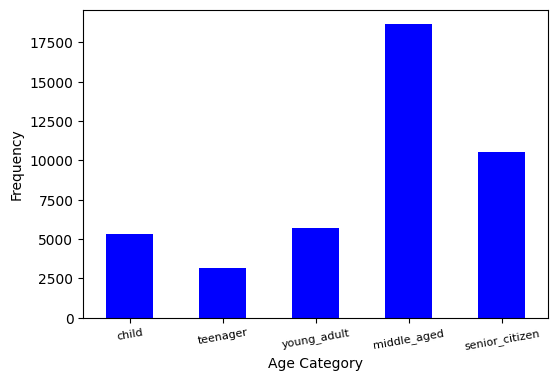

In [11]:
# Plotting a bar plot to check the frequency of the age categories
ax = data['age_category'].value_counts(sort = False).plot.bar(color='b', figsize=(6,4))

plt.xticks(rotation = 10, fontsize = 8)
plt.xlabel('Age Category',fontsize=10)
plt.ylabel('Frequency',fontsize=10)
plt.show()

## Custom Binning

In [6]:
print(data['age'].max())
print(data['age'].min())

82.0
0.08


In [15]:
# Create customer bins to check the intervals
data['age_binned'] = pd.qcut(data['age'], q = 5,  precision=0, duplicates='drop')
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_category,age_binned
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0,child,"(-0.9, 20.0]"
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0,middle_aged,"(50.0, 64.0]"
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0,child,"(-0.9, 20.0]"
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0,senior_citizen,"(64.0, 82.0]"
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0,teenager,"(-0.9, 20.0]"


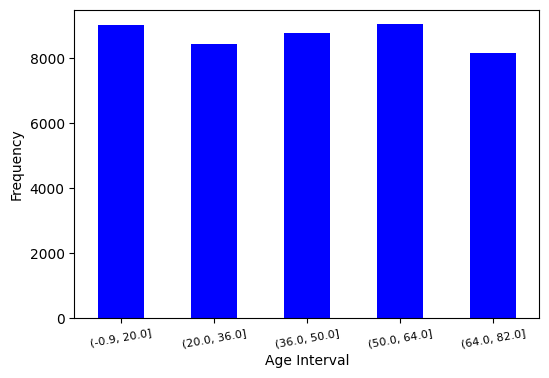

In [16]:
# Plotting a bar plot for the custom bins
ax = data['age_binned'].value_counts(sort = False).plot.bar(color='b', figsize=(6,4))

plt.xticks(rotation = 10, fontsize = 8)
plt.xlabel('Age Interval',fontsize=10)
plt.ylabel('Frequency',fontsize=10)
plt.show()